In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogcheck/sob.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_380.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_517.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_364.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_258.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_237.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_476.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_563.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_159.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_464.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_518.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_141.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_398.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_442.jpg
/kaggle/input/cats-and-dogs-image-classificati

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Задаем параметры модели
input_shape = (150, 150, 3)
num_classes = 2
batch_size = 32

# Создаем генераторы для обучения
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True,
                                  validation_split=0.2)
train_generator = train_datagen.flow_from_directory('/kaggle/input/cats-and-dogs-image-classification/train', 
                                                    target_size=input_shape[:2], 
                                                    batch_size=batch_size, 
                                                    class_mode='binary',
                                                   subset='training')
val_generator = train_datagen.flow_from_directory('/kaggle/input/cats-and-dogs-image-classification/train', 
                                                    target_size=input_shape[:2], 
                                                    batch_size=batch_size, 
                                                    class_mode='binary',
                                                   subset='validation')

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


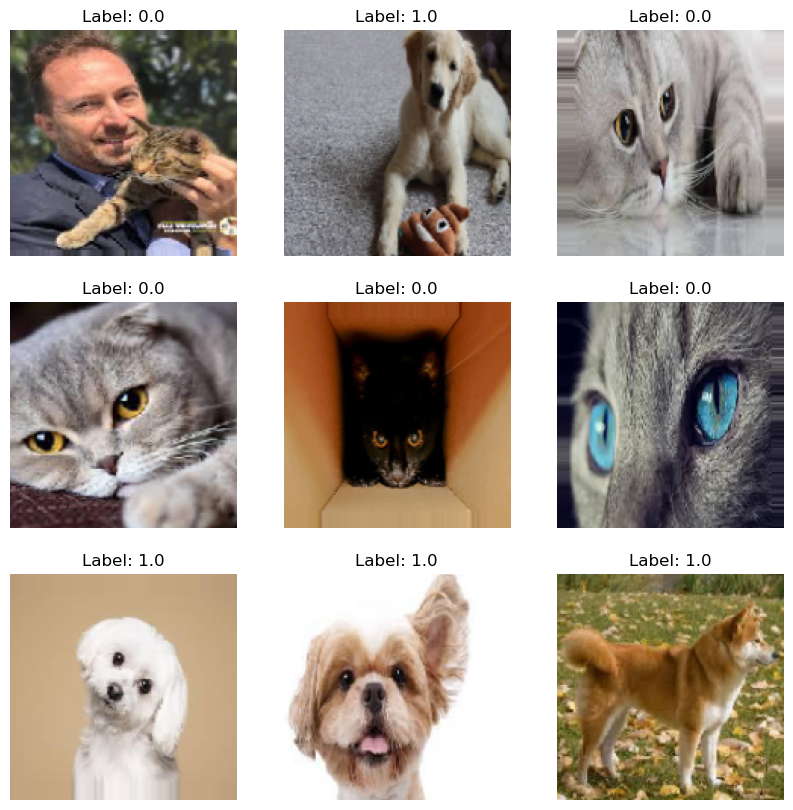

In [45]:
import matplotlib.pyplot as plt

# Получаем следующий батч изображений и меток
images, labels = next(train_generator)

# Отображаем первые 9 изображений и метки
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Получаем следующий батч изображений и меток
images, labels = next(val_generator)

# Отображаем первые 9 изображений и метки
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.show()


In [44]:
train_generator.filenames

['cats/cat_209.jpg',
 'cats/cat_21.jpg',
 'cats/cat_211.jpg',
 'cats/cat_213.jpg',
 'cats/cat_214.jpg',
 'cats/cat_215.jpg',
 'cats/cat_217.jpg',
 'cats/cat_218.jpg',
 'cats/cat_219.jpg',
 'cats/cat_220.jpg',
 'cats/cat_221.jpg',
 'cats/cat_222.jpg',
 'cats/cat_224.jpg',
 'cats/cat_225.jpg',
 'cats/cat_227.jpg',
 'cats/cat_228.jpg',
 'cats/cat_229.jpg',
 'cats/cat_230.jpg',
 'cats/cat_232.jpg',
 'cats/cat_235.jpg',
 'cats/cat_238.jpg',
 'cats/cat_24.jpg',
 'cats/cat_240.jpg',
 'cats/cat_243.jpg',
 'cats/cat_246.jpg',
 'cats/cat_247.jpg',
 'cats/cat_248.jpg',
 'cats/cat_253.jpg',
 'cats/cat_257.jpg',
 'cats/cat_26.jpg',
 'cats/cat_260.jpg',
 'cats/cat_261.jpg',
 'cats/cat_263.jpg',
 'cats/cat_265.jpg',
 'cats/cat_269.jpg',
 'cats/cat_27.jpg',
 'cats/cat_270.jpg',
 'cats/cat_271.jpg',
 'cats/cat_273.jpg',
 'cats/cat_274.jpg',
 'cats/cat_275.jpg',
 'cats/cat_276.jpg',
 'cats/cat_280.jpg',
 'cats/cat_284.jpg',
 'cats/cat_285.jpg',
 'cats/cat_289.jpg',
 'cats/cat_292.jpg',
 'cats/cat_293.jp

In [57]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(inputs)
# x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
# x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = keras.Model(inputs=inputs, outputs=outputs)
model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_74 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 38, 38, 128)       7385

In [59]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
# x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = keras.Model(inputs=inputs, outputs=outputs)
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_79 (Conv2D)          (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 75, 75, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 38, 38, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 38, 38, 32)        4640

In [60]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="try_1.keras",
        save_best_only=True,
        monitor="val_loss")]

model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history_2 = model_2.fit(train_generator, 
                               validation_data = val_generator,
                               epochs=50, callbacks=callbacks)



Epoch 1/50
14/14 [==============================] - 13s 766ms/step - loss: 0.6956 - accuracy: 0.5213 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/50
14/14 [==============================] - 11s 798ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/50
14/14 [==============================] - 11s 771ms/step - loss: 0.6915 - accuracy: 0.5369 - val_loss: 0.6870 - val_accuracy: 0.5091
Epoch 4/50
14/14 [==============================] - 11s 734ms/step - loss: 0.6907 - accuracy: 0.5973 - val_loss: 0.6844 - val_accuracy: 0.6000
Epoch 5/50
14/14 [==============================] - 11s 797ms/step - loss: 0.6876 - accuracy: 0.5951 - val_loss: 0.6776 - val_accuracy: 0.4636
Epoch 6/50
14/14 [==============================] - 11s 764ms/step - loss: 0.6444 - accuracy: 0.6264 - val_loss: 0.8646 - val_accuracy: 0.5364
Epoch 7/50
14/14 [==============================] - 10s 739ms/step - loss: 0.6573 - accuracy: 0.6510 - val_loss: 0.6408 - val_accuracy: 0.6182

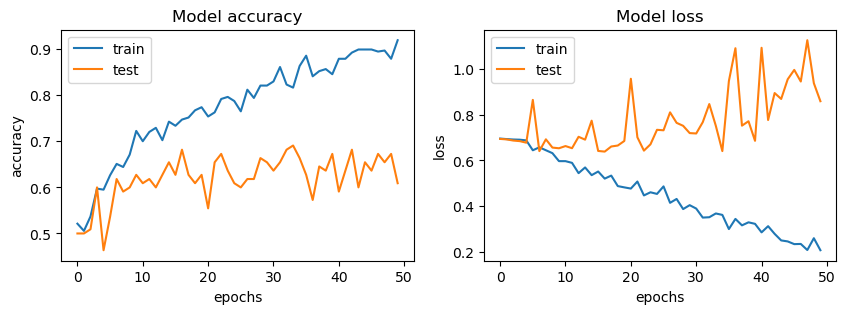

In [61]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history_2.history[met])
    ax[i].plot(history_2.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'test'])

1/1 [==============================] - 0s 107ms/step
pred: [[0.15326819]]
0
{0: 'cats', 1: 'dogs'}
Predicted class: cats


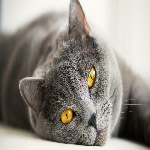

In [78]:
import numpy as np
from tensorflow.keras.preprocessing import image

# загружаем изображение
img_path = '/kaggle/input/kotcheck/kot2.jpg'
img = image.load_img(img_path, target_size=input_shape[:2])

# преобразуем изображение в массив numpy
img_array = image.img_to_array(img)

# масштабируем изображение
img_array = img_array / 255.

# добавляем еще одну размерность в массив, чтобы сделать его 4-мерным (batch size, width, height, channels)
img_array = np.expand_dims(img_array, axis=0)

model = keras.models.load_model(
 "/kaggle/working/try_1.keras")
# получаем предсказание модели
prediction = model.predict(img_array)
print("pred:", prediction)
# преобразуем предсказание в метки классов
predicted_class_indices = np.round(prediction, 1)
if predicted_class_indices < 0.5:
    predicted_class_indices = 0
else:
    predicted_class_indices = 1
print(predicted_class_indices)    
# получаем словарь меток классов
labels = (train_generator.class_indices)

# инвертируем словарь меток классов
inv_labels = {v: k for k, v in labels.items()}
print(inv_labels)
# получаем предсказанную метку класса
predicted_class = inv_labels[predicted_class_indices]

print('Predicted class:', predicted_class)
img

1/1 [==============================] - 0s 103ms/step
pred: [[0.8665269]]
1
{0: 'cats', 1: 'dogs'}
Predicted class: dogs


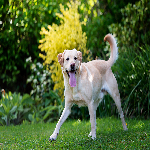

In [75]:
# загружаем изображение
img_path = '/kaggle/input/dogcheck/sob.jpg'
img = image.load_img(img_path, target_size=input_shape[:2])

# преобразуем изображение в массив numpy
img_array = image.img_to_array(img)

# масштабируем изображение
img_array = img_array / 255.

# добавляем еще одну размерность в массив, чтобы сделать его 4-мерным (batch size, width, height, channels)
img_array = np.expand_dims(img_array, axis=0)

model = keras.models.load_model(
 "/kaggle/working/try_1.keras")
# получаем предсказание модели
prediction = model.predict(img_array)
print("pred:", prediction)
# преобразуем предсказание в метки классов
predicted_class_indices = np.round(prediction, 1)
if predicted_class_indices < 0.5:
    predicted_class_indices = 0
else:
    predicted_class_indices = 1
print(predicted_class_indices)    
# получаем словарь меток классов
labels = (train_generator.class_indices)

# инвертируем словарь меток классов
inv_labels = {v: k for k, v in labels.items()}
print(inv_labels)
# получаем предсказанную метку класса
predicted_class = inv_labels[predicted_class_indices]

print('Predicted class:', predicted_class)
img

1/1 [==============================] - 0s 101ms/step
pred: [[0.6156582]]
1
{0: 'cats', 1: 'dogs'}
Predicted class: dogs


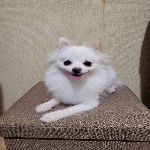

In [79]:
# загружаем изображение
img_path = '/kaggle/input/dogcheck/lili.jpg'
img = image.load_img(img_path, target_size=input_shape[:2])

# преобразуем изображение в массив numpy
img_array = image.img_to_array(img)

# масштабируем изображение
img_array = img_array / 255.

# добавляем еще одну размерность в массив, чтобы сделать его 4-мерным (batch size, width, height, channels)
img_array = np.expand_dims(img_array, axis=0)

model = keras.models.load_model(
 "/kaggle/working/try_1.keras")
# получаем предсказание модели
prediction = model.predict(img_array)
print("pred:", prediction)
# преобразуем предсказание в метки классов
predicted_class_indices = np.round(prediction, 1)
if predicted_class_indices < 0.5:
    predicted_class_indices = 0
else:
    predicted_class_indices = 1
print(predicted_class_indices)    
# получаем словарь меток классов
labels = (train_generator.class_indices)

# инвертируем словарь меток классов
inv_labels = {v: k for k, v in labels.items()}
print(inv_labels)
# получаем предсказанную метку класса
predicted_class = inv_labels[predicted_class_indices]

print('Predicted class:', predicted_class)
img

In [76]:
print(labels)
print(inv_labels)
predicted_class_indices

{'cats': 0, 'dogs': 1}
{0: 'cats', 1: 'dogs'}


1